<a href="https://colab.research.google.com/github/Gaukhar-ai/DecisionTree/blob/master/deep_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import losses
print(tf.__version__)
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD



2.3.0


can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

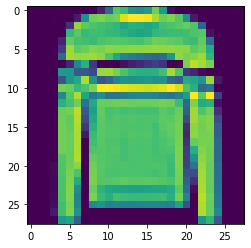

In [ ]:
plt.imshow(X_train[5])


Then, we load the data and do our preprocessing:

In [ ]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Next we one hot code our target variable using to_categorical function of Keras' utils module:

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Now, let's check the size of the data:

In [ ]:
X_train[0].shape

(784,)

So, the data we have is a flattened version of the images where each row in the 28x28 matrix is concatenated side by side.

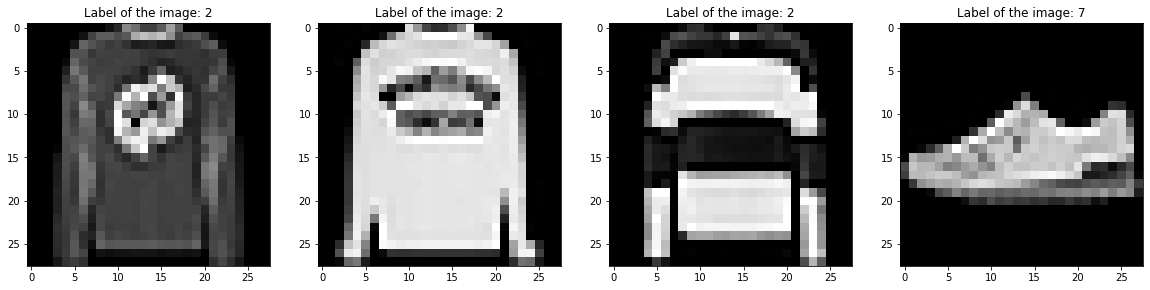

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 15s 31ms/step - loss: 0.9674 - accuracy: 0.7142
Epoch 2/20
469/469 [==============================] - 15s 32ms/step - loss: 0.5993 - accuracy: 0.8057
Epoch 3/20
469/469 [==============================] - 15s 32ms/step - loss: 0.5262 - accuracy: 0.8236
Epoch 4/20
469/469 [==============================] - 15s 32ms/step - loss: 0.4878 - accuracy: 0.8334
Epoch 5/20
469/469 [==============================] - 15s 32ms/step - loss: 0.4639 - accuracy: 0.8407
Epoch 6/20
469/469 [==============================] - 15s 31ms/step - loss: 0.4475 - accuracy: 0.8448
Epoch 7/20
469/469 [==============================] - 15s 32ms/step - loss: 0.4344 - accuracy: 0.8502
Epoch 8/20
469/469 [==============================] - 15s 32ms/step - loss: 0.4225 - accuracy: 0.8544
Epoch 9/20
469/469 [==============================] - 15s 32ms/step - loss: 0.4128 - accuracy: 0.8571
Epoch 10/20
469/469 [==============================] - 15s 32ms/step - loss: 0.406

Evaluating the model

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.39356666803359985
Test accuracy: 0.8615000247955322


test accuracy is 86% with activation = relu, opimizer = sgd, dense 1028, loss=categorical_crossentropy. 

Adding hidden layers:

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 13s 28ms/step - loss: 0.5079 - accuracy: 0.8155
Epoch 2/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3650 - accuracy: 0.8668
Epoch 3/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3279 - accuracy: 0.8801
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3047 - accuracy: 0.8861
Epoch 5/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2863 - accuracy: 0.8928
Epoch 6/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2695 - accuracy: 0.8992
Epoch 7/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2580 - accuracy: 0.9041
Epoch 8/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2452 - accuracy: 0.9077
Epoch 9/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2354 - accuracy: 0.9118
Epoch 10/20
469/469 [==============================] - 13s 28ms/step - loss: 0.226

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3648262917995453
Test accuracy: 0.8956000208854675


Got 89%, Took very long time to process. Performed better than the previous one though with more hidden layers and same batch size. 


Activation function = TAHN

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=500, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 1s 5ms/step - loss: 1.6792 - accuracy: 0.5090
Epoch 2/20
120/120 [==============================] - 1s 4ms/step - loss: 1.1382 - accuracy: 0.6746
Epoch 3/20
120/120 [==============================] - 1s 4ms/step - loss: 0.9529 - accuracy: 0.7116
Epoch 4/20
120/120 [==============================] - 1s 4ms/step - loss: 0.8494 - accuracy: 0.7369
Epoch 5/20
120/120 [==============================] - 1s 4ms/step - loss: 0.7820 - accuracy: 0.7546
Epoch 6/20
120/120 [==============================] - 1s 5ms/step - loss: 0.7335 - accuracy: 0.7663
Epoch 7/20
120/120 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.7768
Epoch 8/20
120/120 [==============================] - 1s 5ms/step - loss: 0.6663 - accuracy: 0.7854
Epoch 9/20
120/120 [==============================] - 1s 5ms/step - loss: 0.6415 - accuracy: 0.7920
Epoch 10/20
120/120 [==============================] - 1s 4ms/step - loss: 0.6203 - accuracy: 0.7982

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5350118279457092
Test accuracy: 0.8148000240325928


Accuracy is 81% was much faster than previos models. Also I experimented with the number of batch sizes: 55 gave 55%, 120 batch size gave 60% and 500 resulted in 81% and still was very quick. Activation = tanh, optimizer='sgd', loss='hinge'. 

Activation F Sigmoid

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# our second dense layer
model.add(Dense(64, activation="sigmoid"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 2.2625 - accuracy: 0.3270
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 2.1230 - accuracy: 0.5026
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 1.9294 - accuracy: 0.5592
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 1.7045 - accuracy: 0.5698
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 1.5174 - accuracy: 0.5865
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 1.3768 - accuracy: 0.6068
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2689 - accuracy: 0.6286
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 1.1824 - accuracy: 0.6470
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 1.1103 - accuracy: 0.6628
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0491 - accuracy: 0.6754

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.735900342464447
Test accuracy: 0.7390000224113464


Sigmoid performed good too with 73% of accuracy and test score is high too. 

The best performer so far is the Relu activation with 6 hidden layers. I'll see with the loss function Hinge if the result is going to improve.

Loss function Hinge

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)


Epoch 1/20
469/469 [==============================] - 12s 26ms/step - loss: 0.9999 - accuracy: 0.4423
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.9789 - accuracy: 0.6204
Epoch 3/20
469/469 [==============================] - 12s 26ms/step - loss: 0.8145 - accuracy: 0.6277
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 0.6131 - accuracy: 0.7024
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.5114 - accuracy: 0.7823
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.4297 - accuracy: 0.8091
Epoch 7/20
469/469 [==============================] - 12s 26ms/step - loss: 0.3869 - accuracy: 0.8199
Epoch 8/20
469/469 [==============================] - 12s 27ms/step - loss: 0.3611 - accuracy: 0.8298
Epoch 9/20
469/469 [==============================] - 13s 27ms/step - loss: 0.3442 - accuracy: 0.8368
Epoch 10/20
469/469 [==============================] - 12s 26ms/step - loss: 0.328

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.32086116075515747
Test accuracy: 0.8429999947547913


very slow, besides performed worse than the categorical_crossentropy loss function with the same params in the model. The test scores in both models are almost same though.

I'll apply the full sample as the batch size on the fastest model.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=X_train.shape[0], epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 0s 2ms/step - loss: 1.0877 - accuracy: 0.1023
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0812 - accuracy: 0.1046
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0764 - accuracy: 0.1085
Epoch 4/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0727 - accuracy: 0.1132
Epoch 5/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0699 - accuracy: 0.1185
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0675 - accuracy: 0.1243
Epoch 7/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0656 - accuracy: 0.1304
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0639 - accuracy: 0.1365
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0624 - accuracy: 0.1427
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0610 - accuracy: 0.1481
Epoch 11/20
1/1 [======================

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.0495413541793823
Test accuracy: 0.2070000022649765


Poor result, only 20% on accuracy with tahn activation and full sample. 

ANN models with different learning rates for stochastic gradient descent.

In [ ]:
from tensorflow.keras import optimizers
sgd_001 = optimizers.SGD(lr=0.01)
sgd_100 = optimizers.SGD(lr=100)
sgd_0000001 = optimizers.SGD(lr=0.0000001)

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_001, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9837 - accuracy: 0.4525
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.8325 - accuracy: 0.6612
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7055 - accuracy: 0.7033
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6246 - accuracy: 0.7423
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.7632
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5233 - accuracy: 0.7782
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.7903
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.8006
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.8074
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8132

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3665217161178589
Test accuracy: 0.8274999856948853


wow, I'm seriously impressed, adding only SGD = 0.01 learning rate improved the previos worse accuracy to a very good 82%, test score is still low though. 

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_100, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.7984 - accuracy: 0.1000
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


the model performed very quick but the accuracy test is the lowest among all the previos examples. 

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_0000001, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0771 - accuracy: 0.1324
Epoch 10/20
469/469 [==============================] - 3s 5ms/step - loss: 1.0771 - accuracy: 0.1324

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.0770572423934937
Test accuracy: 0.13510000705718994


did't improve with the optimizer of sgd_0000001. So it means that 0.01 worked out the best, 100 was too large and 0.0000001 was too slow and didn't work well at all with the given model.

Now, I'll use the second best performer: activation=relu, with more hidden layers, with the best optimizer of 0.01 and loss=categorical_hinge, batch size 128. 

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_001, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 14s 30ms/step - loss: 0.9987 - accuracy: 0.5205
Epoch 2/20
469/469 [==============================] - 14s 29ms/step - loss: 0.9814 - accuracy: 0.6687
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.8404 - accuracy: 0.6399
Epoch 4/20
469/469 [==============================] - 14s 30ms/step - loss: 0.6255 - accuracy: 0.7046
Epoch 5/20
469/469 [==============================] - 14s 30ms/step - loss: 0.5159 - accuracy: 0.7713
Epoch 6/20
469/469 [==============================] - 14s 29ms/step - loss: 0.4388 - accuracy: 0.8002
Epoch 7/20
469/469 [==============================] - 14s 30ms/step - loss: 0.3987 - accuracy: 0.8164
Epoch 8/20
469/469 [==============================] - 14s 30ms/step - loss: 0.3717 - accuracy: 0.8249
Epoch 9/20
469/469 [==============================] - 14s 31ms/step - loss: 0.3537 - accuracy: 0.8313
Epoch 10/20
469/469 [==============================] - 13s 29ms/step - loss: 0.338

This was the best performer: activation=relu, with more hidden layers, with the best optimizer of 0.01 and loss=categorical_crossentropy, batch size 128. 

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_001, loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 14s 29ms/step - loss: 1.1150 - accuracy: 0.6333
Epoch 2/20
469/469 [==============================] - 14s 30ms/step - loss: 0.5912 - accuracy: 0.7950
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 0.5075 - accuracy: 0.8226
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.4693 - accuracy: 0.8350
Epoch 5/20
469/469 [==============================] - 14s 29ms/step - loss: 0.4445 - accuracy: 0.8435
Epoch 6/20
469/469 [==============================] - 13s 28ms/step - loss: 0.4228 - accuracy: 0.8510
Epoch 7/20
469/469 [==============================] - 13s 28ms/step - loss: 0.4071 - accuracy: 0.8567
Epoch 8/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3911 - accuracy: 0.8616
Epoch 9/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3808 - accuracy: 0.8640
Epoch 10/20
469/469 [==============================] - 13s 28ms/step - loss: 0.368

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3784075081348419
Test accuracy: 0.8615999817848206


hm, interesting, so the model performs better without the optimizer set to 
0.01, but with 'adam'

So far the best model accuracy was 89% with more hidden layers, activation relu, loss - categorical cross entropy, batch size 128.